In [1]:
#necessary libraries loading
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#load the data
loan_data_file = pd.read_csv("loan.csv")
loan_data_file.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13964\1427938429.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_file = pd.read_csv("loan.csv")


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#data information
loan_data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [4]:
#checking empty columns
loan_data_file.dropna(axis=1,how='all',inplace=True)
round((100*loan_data_file.isnull().sum())/len(loan_data_file.index))

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
desc                          33.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_deli

In [5]:
 #drop colums in which nan data is very high is percentage
 loan_data_file.drop(labels=['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'],axis=1,inplace=True)
 loan_data_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
loan_data_file.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [7]:
#check rows empty data
round((100*loan_data_file.isnull().sum(axis=1))/len(loan_data_file.index))

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    0.0
39713    0.0
39714    0.0
39715    0.0
39716    0.0
Length: 39717, dtype: float64

In [8]:
#unique target values
loan_data_file['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [9]:
#drop current loan status because it will not provide any past data
loan_status = ['Fully Paid','Charged Off']
loan_data_file=loan_data_file[loan_data_file['loan_status'].isin(loan_status)]
loan_data_file.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [10]:
#convert loan status data
loan_data_file['loan_status']=loan_data_file['loan_status'].map({'Fully Paid':0,'Charged Off':1})
loan_data_file.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,161.03,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [11]:
#Extract necessary columns
loan_data_file = loan_data_file.loc[:,('loan_amnt','term','int_rate','grade','emp_length','home_ownership',
                                      'annual_inc','issue_d','loan_status','purpose','addr_state','dti')]
loan_data_file.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20


In [12]:
#create new column
loan_data_file['year'] = loan_data_file['issue_d'].apply(lambda x:x.split('-')[1])
loan_data_file.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year
0,5000,36 months,10.65%,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11
1,2500,60 months,15.27%,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11
2,2400,36 months,15.96%,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11
3,10000,36 months,13.49%,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11
5,5000,36 months,7.90%,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11


In [13]:
#convert the data type string to int
loan_data_file['year']=loan_data_file['year'].astype(np.int64)
type(loan_data_file['year'][0])

numpy.int64

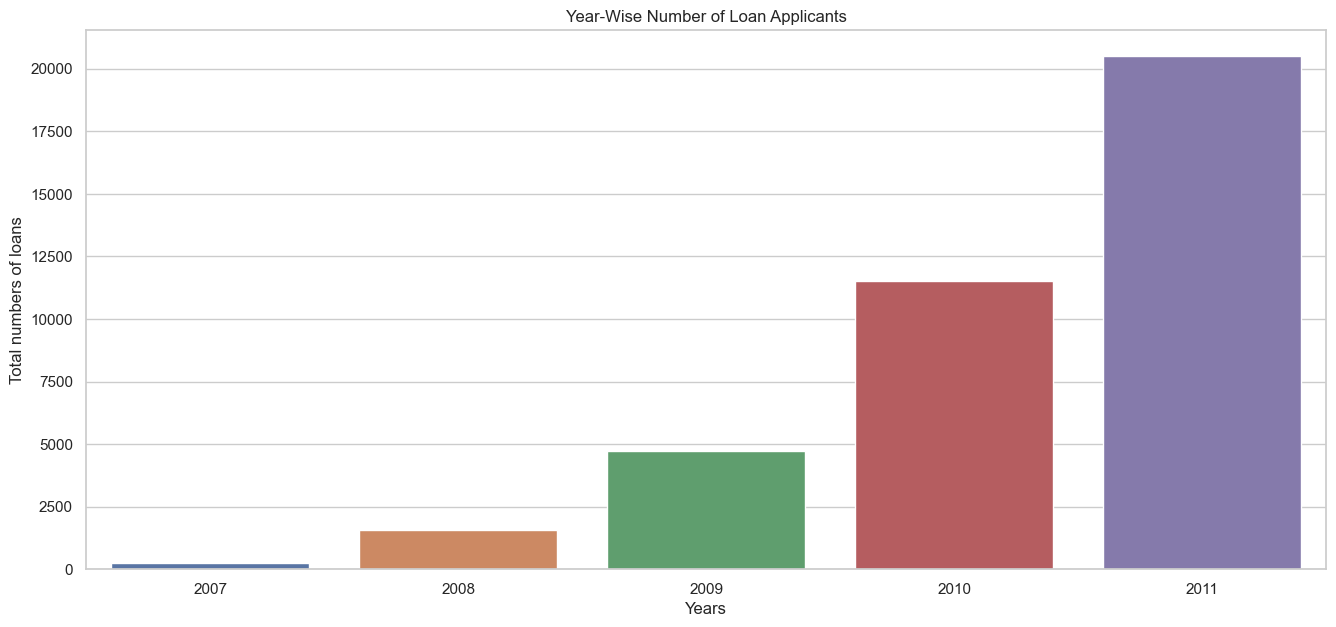

In [14]:
#draw a countplot to show the year wise increasing amount of loans
plt.figure(figsize=(16,7))
sb.set(style="whitegrid")
ax=sb.countplot(x='year',data=loan_data_file)
years = ['2007','2008','2009','2010','2011']
xpos=np.arange(len(years))
ax.set(xlabel='Years', ylabel='Total numbers of loans',title='Year-Wise Number of Loan Applicants')
plt.xticks(xpos,years)
plt.show()

In [15]:
#change the type of int_rate column from string to float
loan_data_file['int_rate']=loan_data_file['int_rate'].str.replace('%','')
loan_data_file['int_rate']=loan_data_file['int_rate'].astype(np.float32)
type(loan_data_file['int_rate'][0])

numpy.float32

In [16]:
#create new column
loan_data_file['month'] = loan_data_file['issue_d'].apply(lambda x:x.split('-')[0])
loan_data_file.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
0,5000,36 months,10.65,B,10+ years,RENT,24000.0,Dec-11,0,credit_card,AZ,27.65,11,Dec
1,2500,60 months,15.27,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
2,2400,36 months,15.96,C,10+ years,RENT,12252.0,Dec-11,0,small_business,IL,8.72,11,Dec
3,10000,36 months,13.49,C,10+ years,RENT,49200.0,Dec-11,0,other,CA,20.00,11,Dec
5,5000,36 months,7.90,A,3 years,RENT,36000.0,Dec-11,0,wedding,AZ,11.20,11,Dec


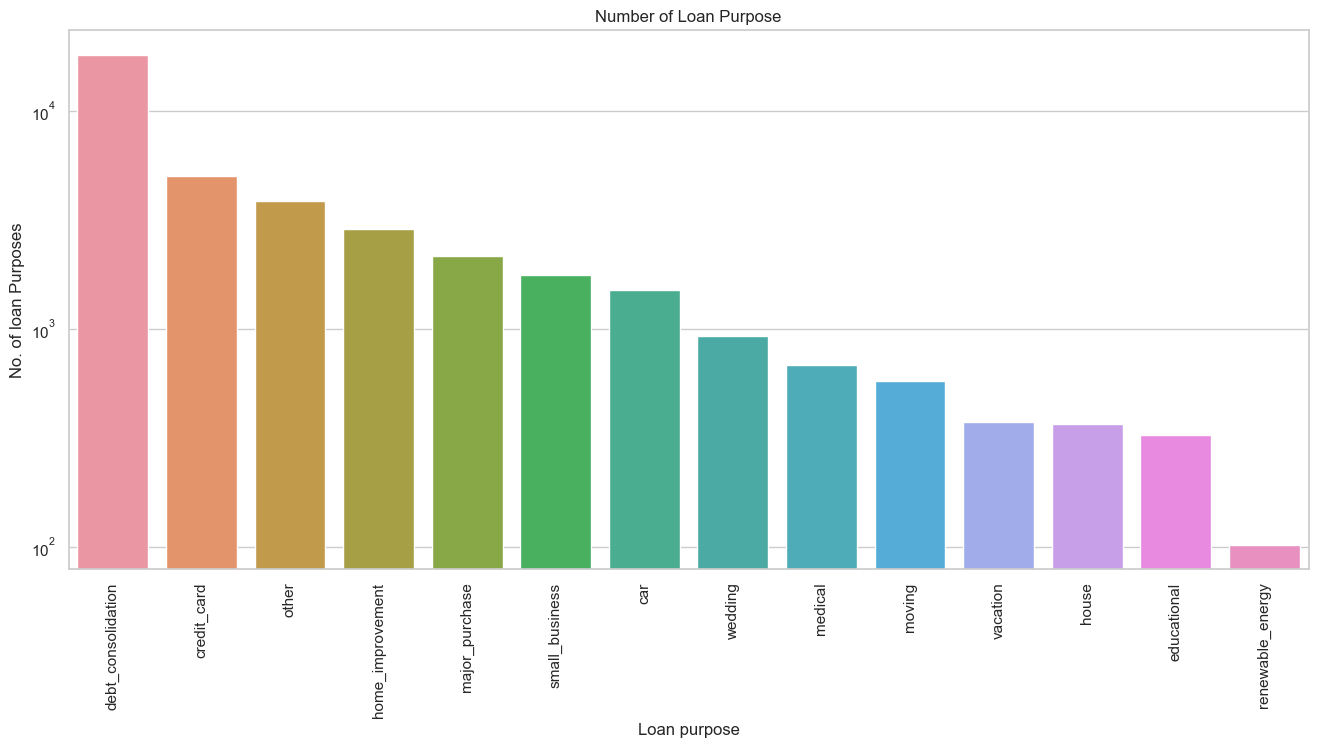

In [17]:
#Count plot to show the different loan purpose from the lending clubs
plt.figure(figsize=(16,7))
ax = sb.countplot(x='purpose',data=loan_data_file,order=loan_data_file['purpose'].value_counts().index)
ax.set(xlabel='Loan purpose', ylabel='No. of loan Purposes',title='Number of Loan Purpose')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13964\2845117434.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sb.distplot(loan_data_file['loan_amnt'],bins=7,color='y')


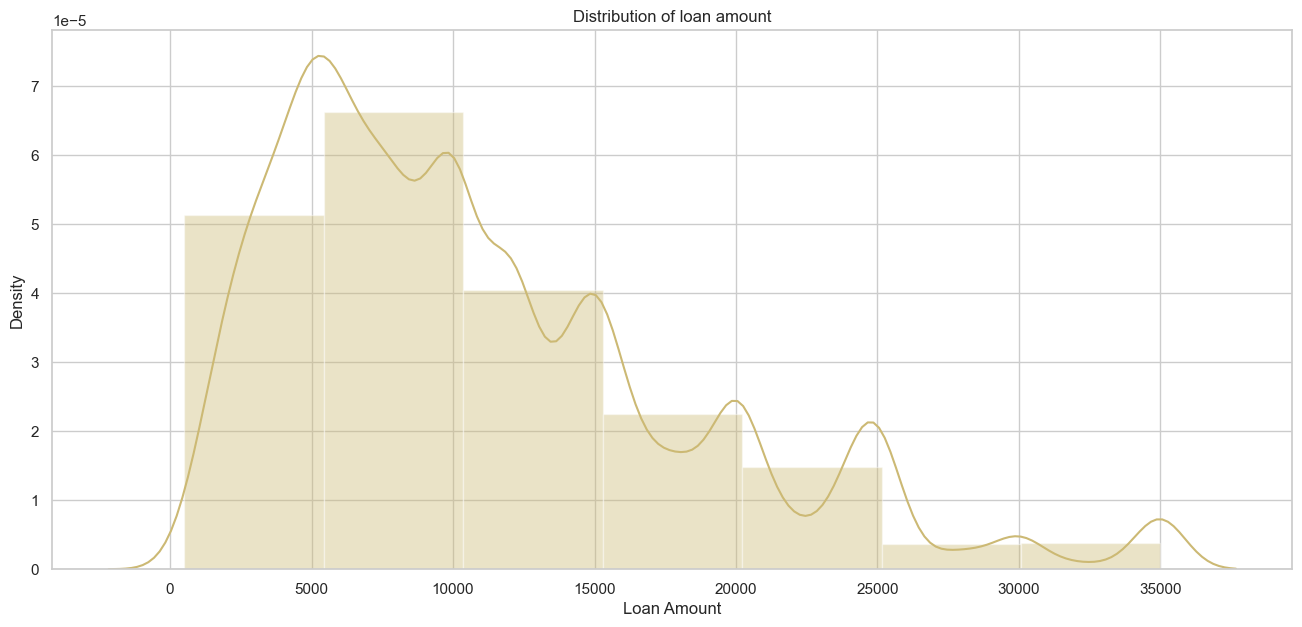

In [18]:
#loan amount
plt.figure(figsize=(16,7))
ax=sb.distplot(loan_data_file['loan_amnt'],bins=7,color='y')
ax.set(xlabel='Loan Amount',title='Distribution of loan amount')
plt.show()

In [19]:
#create a separate dataframe of defaulters
defaulters_df=loan_data_file.loc[loan_data_file['loan_status']==1]
defaulters_df.head()

,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,issue_d,loan_status,purpose,addr_state,dti,year,month
1,2500,60 months,15.270000,C,< 1 year,RENT,30000.0,Dec-11,1,car,GA,1.00,11,Dec
8,5600,60 months,21.280001,F,4 years,OWN,40000.0,Dec-11,1,small_business,CA,5.55,11,Dec
9,5375,60 months,12.690000,B,< 1 year,RENT,15000.0,Dec-11,1,other,TX,18.08,11,Dec
12,9000,36 months,13.490000,C,< 1 year,RENT,30000.0,Dec-11,1,debt_consolidation,VA,10.08,11,Dec
14,10000,36 months,10.650000,B,3 years,RENT,100000.0,Dec-11,1,other,CA,7.06,11,Dec


In [20]:
#calculate the percentage of loan defaulters according to grade
grade_df=pd.DataFrame(data=round((100*defaulters_df['grade'].value_counts())/loan_data_file['grade'].value_counts(),2))
grade_df.rename(columns={'grade':'defaulter_perc'},inplace=True)
grade_df

,defaulter_perc
A,5.99
B,12.21
C,17.19
D,21.99
E,26.85
F,32.68
G,33.78


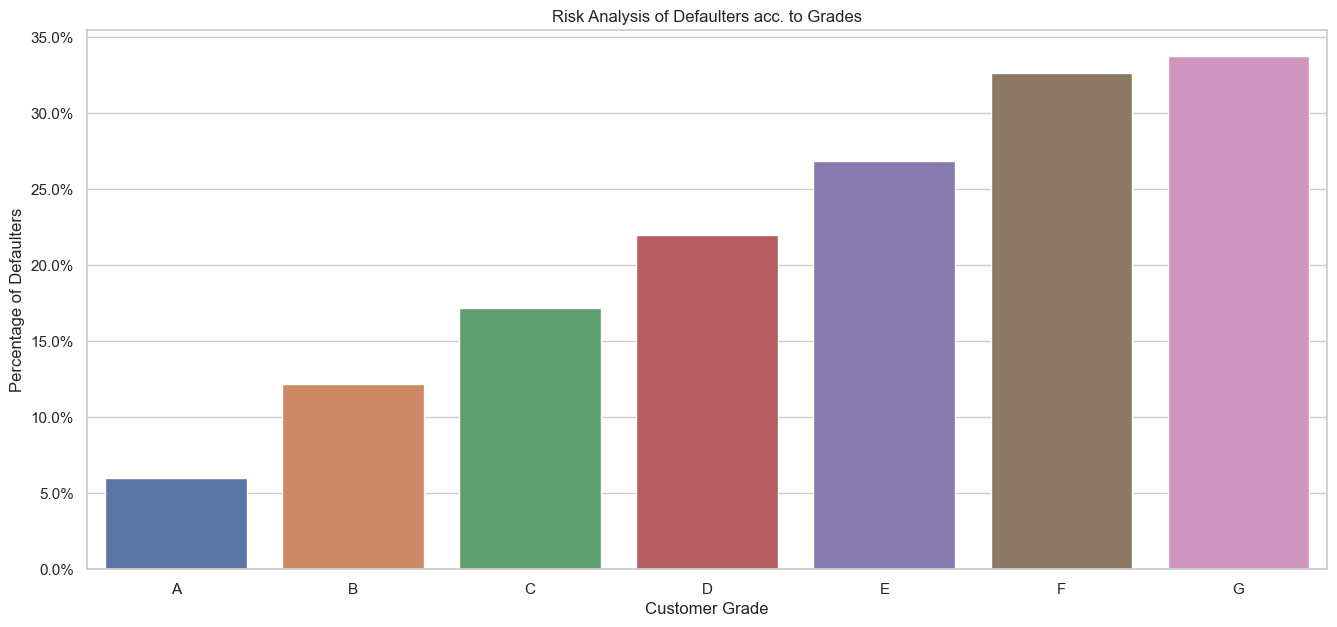

In [21]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=grade_df.index,y='defaulter_perc',data=grade_df)
ax.set(xlabel='Customer Grade', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. to Grades')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [22]:
#calculate the percentage of loan defaulters according to home onwership
home_df=pd.DataFrame(data=round((100*defaulters_df['home_ownership'].value_counts())/loan_data_file['home_ownership'].value_counts(),2))
home_df.rename(columns={'home_ownership':'defaulter_perc'},inplace=True)
home_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
home_df.dropna(inplace=True)
home_df

,defaulter_perc
OTHER,18.37
RENT,15.36
OWN,14.89
MORTGAGE,13.67


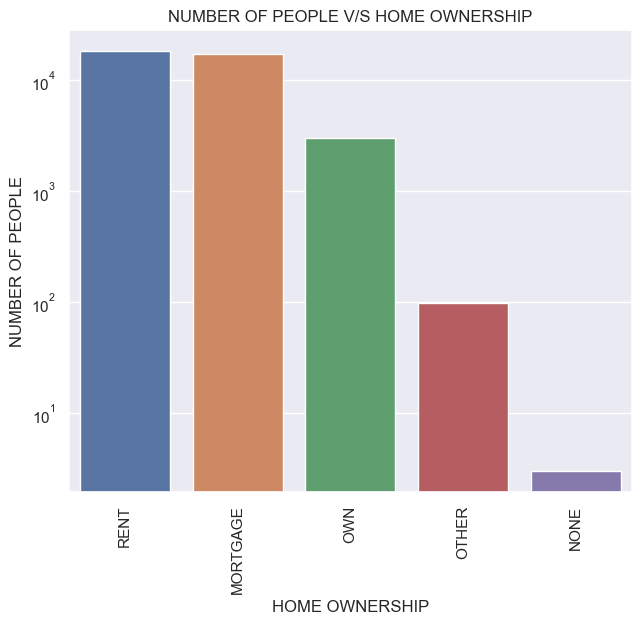

In [23]:
sb.set(style="darkgrid")
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
ax = sb.countplot(x='home_ownership',data=loan_data_file,order=loan_data_file['home_ownership'].value_counts().index)
ax.set(xlabel='HOME OWNERSHIP', ylabel='NUMBER OF PEOPLE',title='NUMBER OF PEOPLE V/S HOME OWNERSHIP')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

In [24]:
#calculate the percentage of loan defaulters according to term
term_df=pd.DataFrame(data=round((100*defaulters_df['term'].value_counts())/loan_data_file['term'].value_counts(),2))
term_df.rename(columns={'term':'defaulter_perc'},inplace=True)
term_df.sort_values(by='defaulter_perc',ascending=False,inplace=True)
term_df

,defaulter_perc
60 months,25.31
36 months,11.09


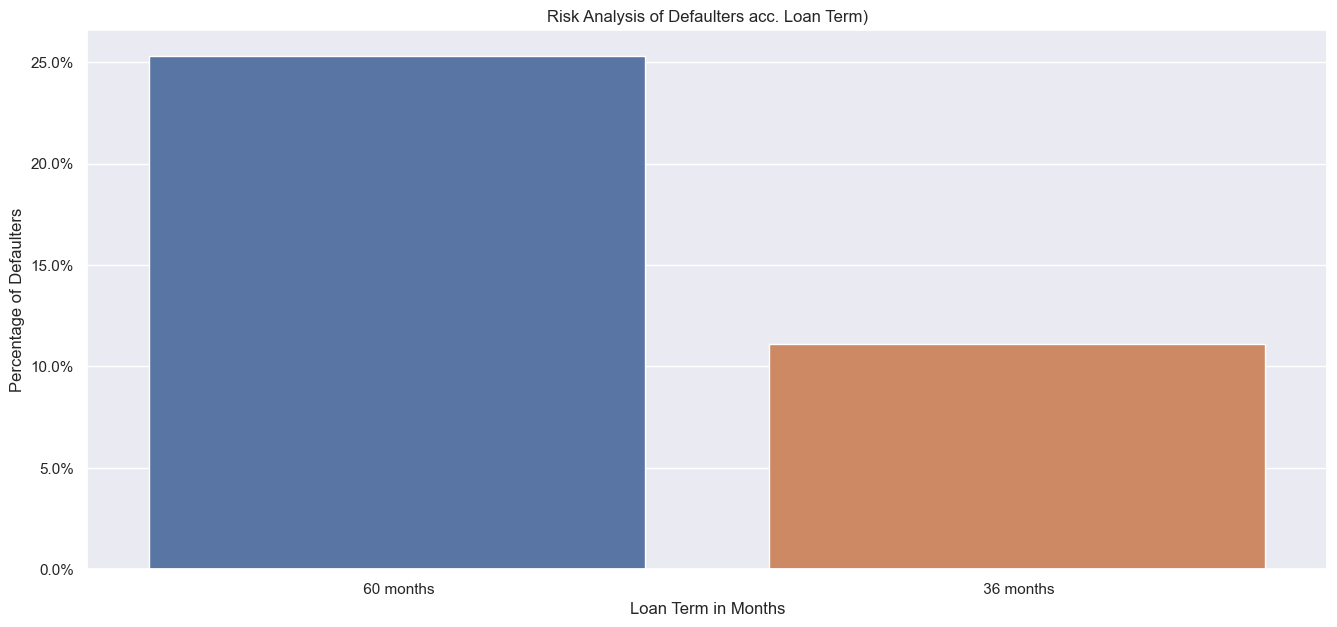

In [25]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16,7))
ax=sb.barplot(x=term_df.index,y='defaulter_perc',data=term_df)
ax.set(xlabel='Loan Term in Months', ylabel='Percentage of Defaulters',title='Risk Analysis of Defaulters acc. Loan Term)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

## The percentage of defaulters in 60 months as compared to 36 months